In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [65]:
slurm=pd.read_csv('fullsample.csv')

In [4]:
slurm.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [66]:
slurm=slurm[(slurm['BEGIN'] != 'Unknown') & (slurm['END'] != 'Unknown')]

### Convert to DateTime Format

In [67]:
slurm['BEGIN']=pd.to_datetime(slurm['BEGIN'], format='%Y-%m-%dT%H:%M:%S')
slurm['END']=pd.to_datetime(slurm['END'], format='%Y-%m-%dT%H:%M:%S')

### Jobs Per Hour Completed

In [68]:
completed_jobs=slurm[slurm['STATE']=='COMPLETED']

In [69]:
completed_jobs=completed_jobs.sort_values('END', ascending='False')

In [70]:
bins = pd.date_range(completed_jobs['END'].min()+timedelta(minutes=-60), completed_jobs['END'].max()+timedelta(minutes=60), freq='60min')
df_temp = completed_jobs.loc[:, ['END', 'STATE']]
df_temp["bins"] = pd.cut(df_temp['END'], bins=bins)
df_temp['period'] = [x.right for x in df_temp['bins']]
completed_jobs_hourly = df_temp.groupby(['period', 'STATE']).agg({'END': 'count'}).reset_index()
completed_jobs_hourly

,period,STATE,END
0,2020-10-01 00:10:15,COMPLETED,1
1,2020-10-01 01:10:15,COMPLETED,587
2,2020-10-01 02:10:15,COMPLETED,1127
3,2020-10-01 03:10:15,COMPLETED,1118
4,2020-10-01 04:10:15,COMPLETED,995
...,...,...,...
8919,2021-10-07 17:10:15,COMPLETED,8
8920,2021-10-07 18:10:15,COMPLETED,8
8921,2021-10-07 19:10:15,COMPLETED,8
8922,2021-10-07 20:10:15,COMPLETED,8


In [76]:
bins = pd.date_range(completed_jobs['END'].min()+timedelta(days=-7), completed_jobs['END'].max()+timedelta(days=7), freq='w')
df_temp = completed_jobs.loc[:, ['END', 'STATE']]
df_temp["bins"] = pd.cut(df_temp['END'], bins=bins)
df_temp['period'] = [x.right for x in df_temp['bins']]
completed_jobs_weekly = df_temp.groupby(['period', 'STATE']).agg({'END': 'count'}).reset_index()
completed_jobs_weekly

,period,STATE,END
0,2020-10-04 00:10:15,COMPLETED,79124
1,2020-10-11 00:10:15,COMPLETED,189960
2,2020-10-18 00:10:15,COMPLETED,139384
3,2020-10-25 00:10:15,COMPLETED,146996
4,2020-11-01 00:10:15,COMPLETED,198849
5,2020-11-08 00:10:15,COMPLETED,60665
6,2020-11-15 00:10:15,COMPLETED,119677
7,2020-11-22 00:10:15,COMPLETED,101602
8,2020-11-29 00:10:15,COMPLETED,74643
9,2020-12-06 00:10:15,COMPLETED,183682


### Visualizing Completed Jobs

<AxesSubplot:xlabel='period'>

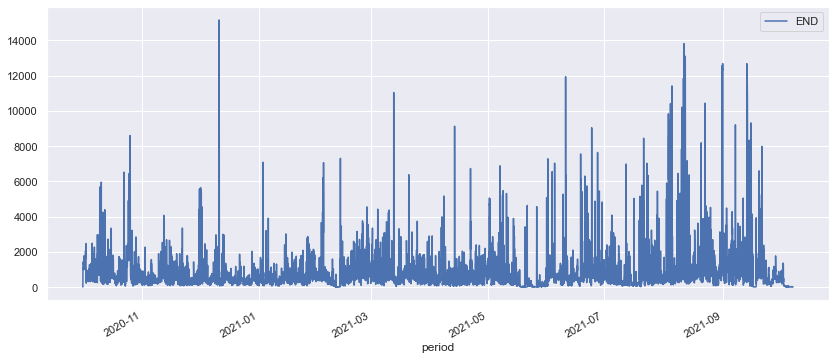

In [35]:
import seaborn as sns
sns.set()

completed_jobs_hourly.plot(kind='line',legend=True, figsize=(14,6), x='period', y='END')
# ax.set_xticklabels(jobs_pivot_tbl.index, rotation=90, ha='right')

In [23]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0


In [37]:
completed_jobs['Rolling Jobs Completed by Hour']=completed_jobs_sorted.rolling('1h', on ='END')['JOBID'].count()

In [38]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,Rolling Jobs Completed by Hour
6640577,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096Mc,868.77M,12:00:00,00:04:20,1,1,production,0:0,1.0
6640635,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000Mn,0.09M,2-00:00:00,00:02:20,1,1,sam,0:0,2.0
6640627,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024Mc,221.10M,00:30:00,00:02:09,1,1,production,0:0,3.0
6640651,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000Mn,0.09M,2-00:00:00,00:02:07,1,1,sam,0:0,4.0
6640654,24460671,COMPLETED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024Mc,636.96M,00:30:00,00:00:45,1,1,production,0:0,5.0


In [94]:
completed_jobs_hourly['rolling']=completed_jobs_hourly.rolling('24h', on='period')['END'].sum()
completed_jobs_hourly['rolling avg']=completed_jobs_hourly.rolling('24h', on='period')['END'].mean()
completed_jobs_hourly['rolling weekly avg']=completed_jobs_hourly.rolling('7d', on='period')['END'].mean()

In [140]:
completed_jobs_hourly.head()

,period,STATE,END,rolling,rolling avg,rolling weekly avg
0,2020-10-01 00:10:15,COMPLETED,1,1.0,1.000000,1.000000
1,2020-10-01 01:10:15,COMPLETED,587,588.0,294.000000,294.000000
2,2020-10-01 02:10:15,COMPLETED,1127,1715.0,571.666667,571.666667
3,2020-10-01 03:10:15,COMPLETED,1118,2833.0,708.250000,708.250000
4,2020-10-01 04:10:15,COMPLETED,995,3828.0,765.600000,765.600000


### Zooming in

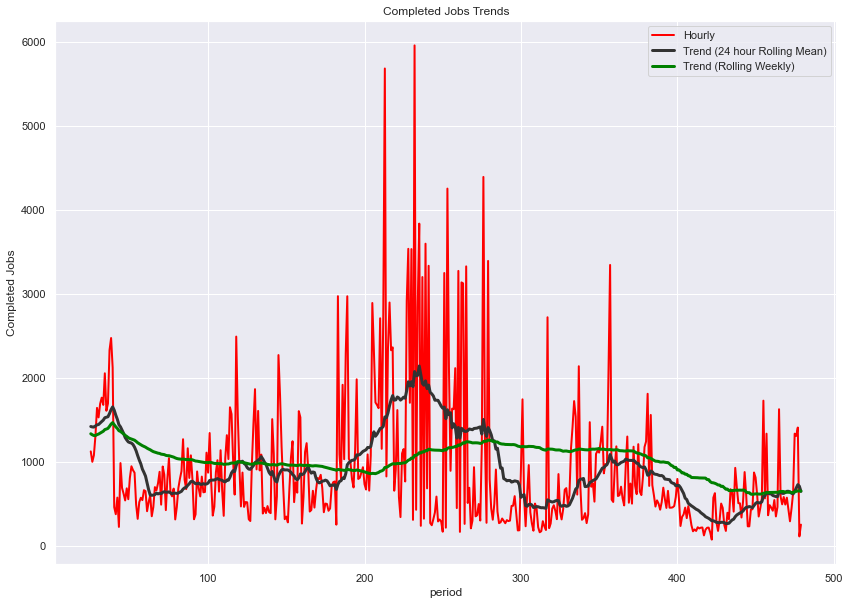

In [97]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(completed_jobs_hourly.iloc[25:480,:]['END'], linewidth=2, color='red', label='Hourly')
#ax.plot(completed_jobs_hourly.iloc[25:480,:]['rolling'], linewidth=2, label='24hr Rolling Sum')
ax.plot(completed_jobs_hourly.iloc[25:480,:]['rolling avg'], color='0.2', linewidth=3,
label='Trend (24 hour Rolling Mean)')
ax.plot(completed_jobs_hourly.iloc[25:480,:]['rolling weekly avg'], color='green', linewidth=3,
label='Trend (Rolling Weekly)')
# Set x-ticks to yearly interval and add legend and labels
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('period')
ax.set_ylabel('Completed Jobs')
ax.set_title('Completed Jobs Trends');

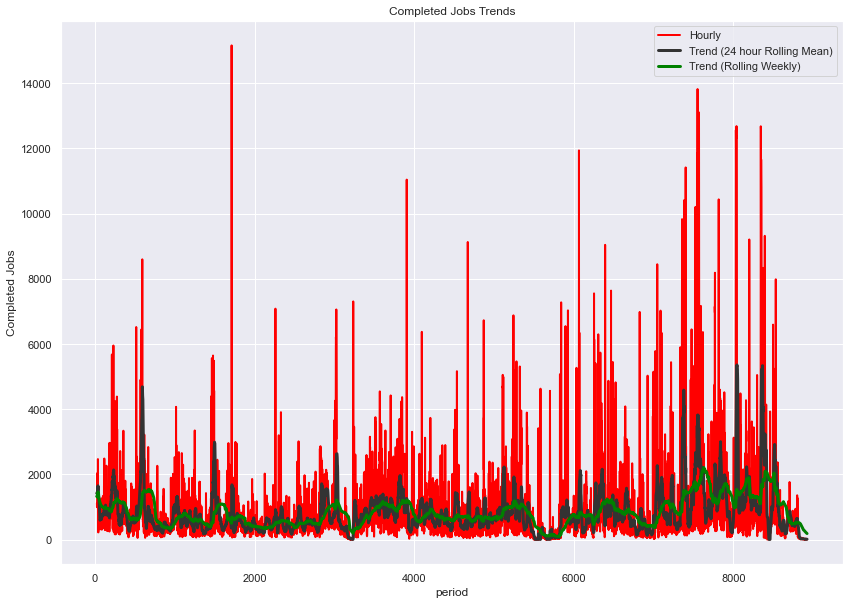

In [98]:
start_idx = 25
end_idx = completed_jobs_hourly.shape[0]
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(completed_jobs_hourly.iloc[start_idx:end_idx,:]['END'], linewidth=2, color='red', label='Hourly')
#ax.plot(completed_jobs_hourly.iloc[start_idx:end_idx,:]['rolling'], linewidth=2, label='24hr Rolling Sum')
ax.plot(completed_jobs_hourly.iloc[start_idx:end_idx,:]['rolling avg'], color='0.2', linewidth=3,
label='Trend (24 hour Rolling Mean)')
ax.plot(completed_jobs_hourly.iloc[start_idx:end_idx,:]['rolling weekly avg'], color='green', linewidth=3,
label='Trend (Rolling Weekly)')
# Set x-ticks to yearly interval and add legend and labels
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('period')
ax.set_ylabel('Completed Jobs')
ax.set_title('Completed Jobs Trends');

array([ 2250.16795918, 85328.7444898 ])

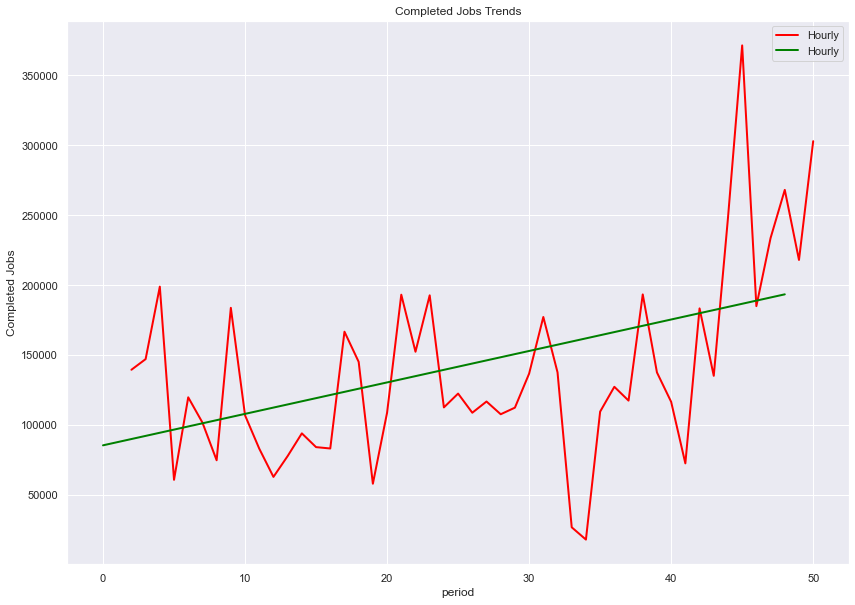

In [115]:
import numpy as np
completed_jobs_weekly = completed_jobs_weekly.iloc[1:completed_jobs_weekly.shape[0]-2,:]
coefs, resid, _, _, _ = np.polyfit(range(completed_jobs_weekly.shape[0]),completed_jobs_weekly['END'],1,full=True)


start_idx = 0
end_idx = completed_jobs_weekly.shape[0]
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(completed_jobs_weekly.iloc[start_idx:end_idx,:]['END'], linewidth=2, color='red', label='Hourly')
ax.plot([coefs[0]*x + coefs[1] for x in range(completed_jobs_weekly.shape[0])], linewidth=2, color='green', label='Hourly')

ax.legend()
ax.set_xlabel('period')
ax.set_ylabel('Completed Jobs')
ax.set_title('Completed Jobs Trends')
coefs

In [110]:
list(range(5))

[0, 1, 2, 3, 4]

In [121]:
mu = np.mean(completed_jobs_weekly.loc[:,'END'])
stdev = np.std(completed_jobs_weekly.loc[:,'END'])
completed_jobs_weekly['z'] = ((completed_jobs_weekly.loc[:,'END'] - mu)/stdev)
#completed_jobs_weekly['z'].sort_values()

34   -1.792855
33   -1.663013
19   -1.203061
5    -1.161513
12   -1.130699
41   -0.988056
8    -0.955130
13   -0.910541
11   -0.832302
16   -0.830693
15   -0.816312
14   -0.670908
7    -0.557087
10   -0.480339
28   -0.469059
26   -0.453025
20   -0.452700
35   -0.441656
29   -0.399473
24   -0.396785
40   -0.338007
27   -0.334626
37   -0.324999
6    -0.290213
25   -0.250806
36   -0.179153
43   -0.063485
30   -0.040127
39   -0.027341
32   -0.026426
2     0.000756
18    0.084266
3     0.113146
22    0.191133
17    0.402742
31    0.558142
42    0.649004
9     0.654807
46    0.672923
23    0.787025
21    0.793729
38    0.796741
4     0.878744
49    1.160294
47    1.392175
44    1.603134
48    1.900452
50    2.414857
45    3.426319
Name: z, dtype: float64

### Group the data by month, to visualize yearly seasonality

In [85]:
month_tally=completed_jobs_hourly.groupby(pd.Grouper(key='period',freq='1M')).sum()

In [139]:
month_tally

,END,rolling,rolling avg
period,,,
2020-10-31,753908,17984036.0,7.589410e+05
2020-11-30,391655,9088329.0,3.786804e+05
2020-12-31,453418,11208364.0,4.670152e+05
2021-01-31,465231,11107784.0,4.628243e+05
2021-02-28,512438,12240820.0,5.100342e+05
2021-03-31,623437,14983624.0,6.243177e+05
2021-04-30,479710,11554353.0,4.814314e+05
2021-05-31,408797,9799153.0,4.083725e+05
2021-06-30,623187,14921825.0,6.217427e+05


Text(0.5, 1.0, 'Jobs Completed')

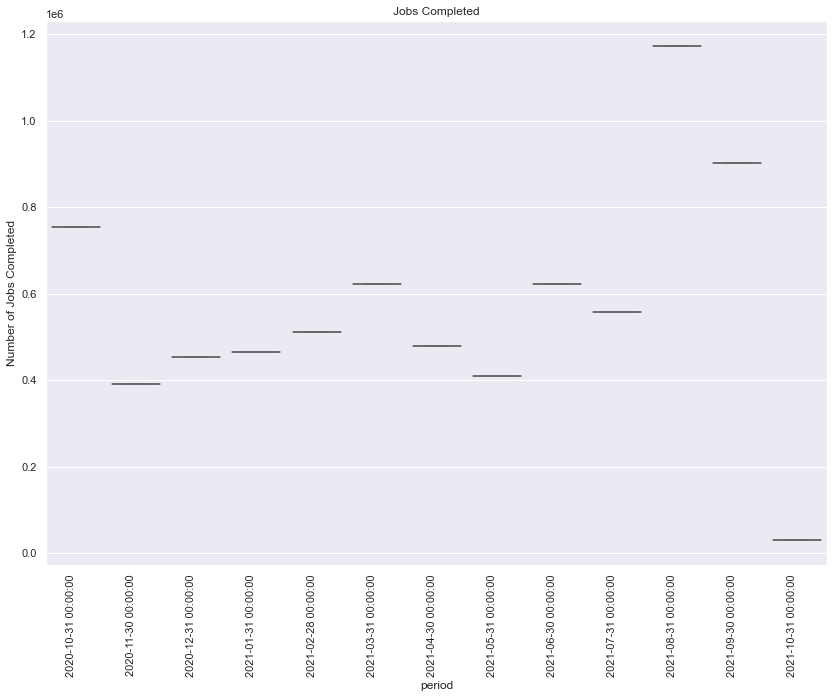

In [92]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,10))
sns.boxplot(data=month_tally, x=month_tally.index, y=month_tally['END'],color='#99c2a2');
ax.set_xticklabels(month_tally.index, rotation=90, ha='right')
ax.set_ylabel('Number of Jobs Completed')
ax.set_title('Jobs Completed')

### Largest number of jobs per hour vs rolling avg

In [142]:
df=completed_jobs_hourly.sort_values('END', ascending=False)

In [154]:
df.head(30)

,period,STATE,END,rolling,rolling avg,rolling weekly avg
1713,2020-12-11 09:10:15,COMPLETED,15161,23380.0,974.166667,593.916667
7551,2021-08-11 17:10:15,COMPLETED,13822,89288.0,3720.333333,1610.226190
7569,2021-08-12 11:10:15,COMPLETED,13105,82294.0,3428.916667,1739.767857
8039,2021-09-01 01:10:15,COMPLETED,12685,123943.0,5164.291667,1508.113095
8343,2021-09-13 17:10:15,COMPLETED,12680,40213.0,1675.541667,1236.392857
8344,2021-09-13 18:10:15,COMPLETED,12580,52463.0,2185.958333,1310.226190
8031,2021-08-31 17:10:15,COMPLETED,12562,53189.0,2216.208333,1133.952381
8037,2021-08-31 23:10:15,COMPLETED,12393,100561.0,4190.041667,1374.928571
8038,2021-09-01 00:10:15,COMPLETED,12320,112058.0,4669.083333,1440.172619
8032,2021-08-31 18:10:15,COMPLETED,12161,64490.0,2687.083333,1203.863095


In [152]:
df.describe()

,END,rolling,rolling avg,rolling weekly avg
count,8924.000000,8924.000000,8924.000000,8924.000000
mean,826.432541,19833.405312,827.476667,836.133573
std,1191.280657,15769.740979,656.912606,402.898635
min,1.000000,1.000000,1.000000,1.000000
25%,250.000000,10131.750000,423.135417,551.645833
50%,485.500000,15971.000000,666.229167,736.000000
75%,913.000000,24700.750000,1031.489583,1073.247024
max,15161.000000,128655.000000,5360.625000,2213.029762


In [146]:
df_hourly=df[['period', 'END']]

In [156]:
df_hourly.sort_values('period', ascending=False)

,period,END
8923,2021-10-07 21:10:15,5
8922,2021-10-07 20:10:15,8
8921,2021-10-07 19:10:15,8
8920,2021-10-07 18:10:15,8
8919,2021-10-07 17:10:15,8
...,...,...
4,2020-10-01 04:10:15,995
3,2020-10-01 03:10:15,1118
2,2020-10-01 02:10:15,1127
1,2020-10-01 01:10:15,587


In [153]:
df_hourly[df_hourly['END']>=1000].count()

period    2009
END       2009
dtype: int64

## RESOURCES REQUESTED

In [14]:
df=completed_jobs[['BEGIN','END','REQTIME', 'USEDTIME']].set_index('BEGIN')

In [17]:
df.head()

,END,REQTIME,USEDTIME
BEGIN,,,
2020-10-01 00:05:55,2020-10-01 00:10:15,12:00:00,00:04:20
2020-10-01 00:10:38,2020-10-01 00:12:58,2-00:00:00,00:02:20
2020-10-01 00:11:22,2020-10-01 00:13:31,00:30:00,00:02:09
2020-10-01 00:15:16,2020-10-01 00:17:23,2-00:00:00,00:02:07
2020-10-01 00:17:08,2020-10-01 00:17:53,00:30:00,00:00:45


In [24]:
df['REQTIME']=pd.to_timedelta(df['REQTIME'].str.replace('-', ' days '))

In [26]:
df['USEDTIME']=pd.to_timedelta(df['USEDTIME'].str.replace('-', ' days '))

In [30]:
df['Diff REQTIME_USEDTIME']=df['REQTIME']-df['USEDTIME']

In [41]:
df.columns

Index(['END', 'REQTIME', 'USEDTIME', 'Diff REQTIME_USEDTIME'], dtype='object')

In [45]:
df.groupby(pd.Grouper(key='END',freq='H')).sum().describe()

,REQTIME,USEDTIME,Diff REQTIME_USEDTIME
count,8925,8925,8925
mean,765 days 10:43:25.694117648,130 days 16:50:25.780392156,634 days 17:52:59.913725488
std,1012 days 04:27:50.328752640,150 days 03:25:31.014796408,970 days 03:11:49.528136656
min,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,349 days 05:05:00,73 days 22:37:15,242 days 22:28:24
50%,559 days 17:20:00,110 days 15:24:29,419 days 18:57:46
75%,894 days 18:00:00,154 days 14:43:08,739 days 06:36:47
max,36599 days 02:00:00,5932 days 06:05:11,36391 days 09:18:50


In [50]:
df_req=df.groupby(pd.Grouper(key='END',freq='H')).sum()


In [52]:
date_label=df['END'].dt.strftime('%Y-%m')

In [54]:
import seaborn as sns

In [58]:
#fig, ax = plt.subplots(figsize=(30,16))

#sns.barplot(x=df.index, y='Diff REQTIME_USEDTIME', data=df_req)

In [60]:
slurm['JOBID'].str.contains('_')


1          False
2          False
3          False
4           True
5           True
           ...  
7395880    False
7395881    False
7395882    False
7395883    False
7395884    False
Name: JOBID, Length: 7395234, dtype: bool

In [61]:
from pandas.plotting import autocorrelation_plot

(0.0, 50.0)

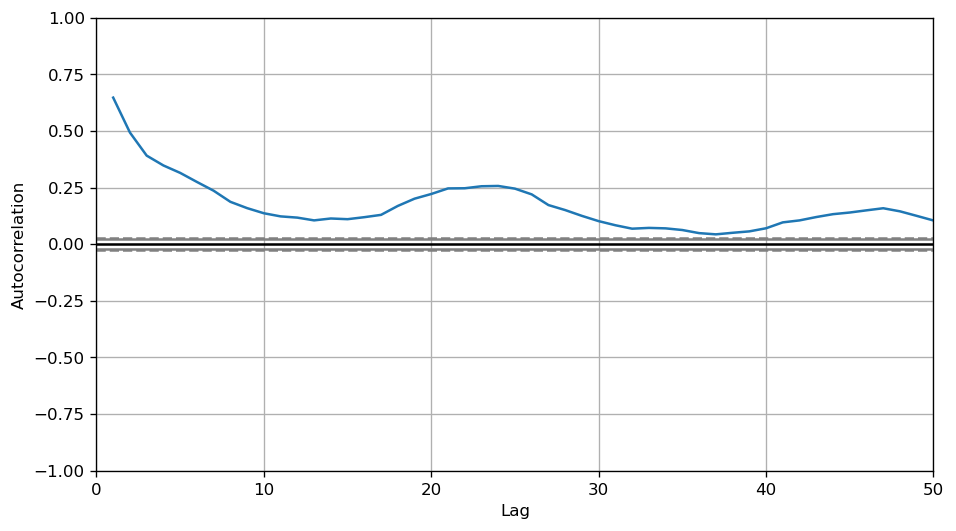

In [86]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})

autocorrelation_plot(completed_jobs_hourly['END'])
plt.xlim(0,50)

In [88]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
6640577,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096Mc,868.77M,12:00:00,00:04:20,1,1,production,0:0
6640635,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000Mn,0.09M,2-00:00:00,00:02:20,1,1,sam,0:0
6640627,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024Mc,221.10M,00:30:00,00:02:09,1,1,production,0:0
6640651,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000Mn,0.09M,2-00:00:00,00:02:07,1,1,sam,0:0
6640654,24460671,COMPLETED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024Mc,636.96M,00:30:00,00:00:45,1,1,production,0:0


In [98]:
#on average it takes 14min to complete running the job
(completed_jobs['END']-completed_jobs['BEGIN']).describe()

count                      7375084
mean     0 days 03:47:45.648105160
std      0 days 12:40:52.483733605
min              -1 days +23:02:54
25%                0 days 00:02:38
50%                0 days 00:13:56
75%                0 days 01:28:18
max               34 days 23:15:05
dtype: object

In [102]:
completed_jobs_sorted1=completed_jobs.sort_values('END', ascending=True)

In [104]:
completed_jobs_sorted1['Rolling Jobs Completed by Hour']=completed_jobs_sorted1.rolling('1h', on ='END')['JOBID'].count()

In [107]:
completed_jobs_sorted1['JOBLENGTH']=completed_jobs_sorted1['END']-completed_jobs_sorted1['BEGIN']

In [108]:
completed_jobs_sorted1.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,Rolling Jobs Completed by Hour,JOBLENGTH
6640577,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096Mc,868.77M,12:00:00,00:04:20,1,1,production,0:0,1.0,0 days 00:04:20
6640635,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000Mn,0.09M,2-00:00:00,00:02:20,1,1,sam,0:0,2.0,0 days 00:02:20
6640627,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024Mc,221.10M,00:30:00,00:02:09,1,1,production,0:0,3.0,0 days 00:02:09
6640651,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000Mn,0.09M,2-00:00:00,00:02:07,1,1,sam,0:0,4.0,0 days 00:02:07
6640654,24460671,COMPLETED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024Mc,636.96M,00:30:00,00:00:45,1,1,production,0:0,5.0,0 days 00:00:45


In [117]:
#completed_jobs_sorted1[(completed_jobs_sorted1['PARTITION'] =='production') & (completed_jobs_sorted1['EXITCODE']==0.00])]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-117-495b2d7a3d4e>, line 1)

In [123]:
#On what days it took a job 1.5 hrs to complete
completed_jobs_sorted1[(completed_jobs_sorted1['JOBLENGTH']>'01:29:00') & (completed_jobs_sorted1['PARTITION']=='production')].count()/completed_jobs_sorted1.shape[0]

JOBID                             0.240405
STATE                             0.240405
BEGIN                             0.240405
END                               0.240405
REQMEM                            0.240405
USEDMEM                           0.240405
REQTIME                           0.240405
USEDTIME                          0.240405
NODES                             0.240405
CPUS                              0.240405
PARTITION                         0.240405
EXITCODE                          0.240405
Rolling Jobs Completed by Hour    0.240405
JOBLENGTH                         0.240405
dtype: float64

In [113]:
#completed_jobs_sorted1['JOBLENGTH'].dt.total_seconds()/60/60

6640577    0.072222
6640635    0.038889
6640627    0.035833
6640651    0.035278
6640654    0.012500
             ...   
927386     0.031944
927387     0.038611
927388     0.026389
1491977    0.026944
1491978    0.029167
Name: JOBLENGTH, Length: 7375084, dtype: float64

In [96]:
completed_jobs[completed_jobs['USEDTIME']<'00:05:00']
/completed_jobs.shape[0]

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
           ... 
REQMEM      NaN
REQTIME     NaN
STATE       NaN
USEDMEM     NaN
USEDTIME    NaN
Length: 7375096, dtype: object

In [124]:
slurm['JOBID'].count()

7395234

In [126]:
(slurm[slurm['STATE']=='COMPLETED'].count()/slurm['JOBID'].count())*100


JOBID        99.727527
STATE        99.727527
BEGIN        99.727527
END          99.727527
REQMEM       99.727527
USEDMEM      99.727527
REQTIME      99.727527
USEDTIME     99.727527
NODES        99.727527
CPUS         99.727527
PARTITION    99.727527
EXITCODE     99.727527
dtype: float64

In [127]:
completed_jobs_sorted1['JOBLENGTH'].describe()

count                      7375084
mean     0 days 03:47:45.648105160
std      0 days 12:40:52.483733605
min              -1 days +23:02:54
25%                0 days 00:02:38
50%                0 days 00:13:56
75%                0 days 01:28:18
max               34 days 23:15:05
Name: JOBLENGTH, dtype: object

In [132]:
#completed_jobs_weekly = df_temp.groupby(['period', 'STATE']).agg({'END': 'count'}).reset_index()

completed_jobs_sorted1.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,Rolling Jobs Completed by Hour,JOBLENGTH
6640577,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096Mc,868.77M,12:00:00,00:04:20,1,1,production,0:0,1.0,0 days 00:04:20
6640635,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000Mn,0.09M,2-00:00:00,00:02:20,1,1,sam,0:0,2.0,0 days 00:02:20
6640627,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024Mc,221.10M,00:30:00,00:02:09,1,1,production,0:0,3.0,0 days 00:02:09
6640651,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000Mn,0.09M,2-00:00:00,00:02:07,1,1,sam,0:0,4.0,0 days 00:02:07
6640654,24460671,COMPLETED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024Mc,636.96M,00:30:00,00:00:45,1,1,production,0:0,5.0,0 days 00:00:45


In [134]:
#completed_jobs_sorted1.set_index('END').resample('W')['JOBID'].sum()
